The fear of the LORD is the beginning of knowledge, but fools despise wisdom and discipline. Proverbs 1:7

-------

# Welcome to "AI for All"

Lecture Notes by idebtor@gmail.com, Handong Global University


# Chapter 4. 선형 회귀(Linear Regression)

:본 단원은 참고문헌 (3) & (4)에서 대부분  발췌한 것입니다. 

--------------

가장 간단한 형태의 선형 회귀를 연습하면서도 기계학습과 딥러닝의 기초가 되며 핵심을 이해할 수 있는 시작입니다.  

## 2장 정리하기 정답

1. 입력
1. 레이블(label) 혹은 타깃(target)
1. 모델(model)
1. 규칙 혹은 하이퍼파라미터(hyperparameters)

## 1. 일차 함수로 이해하는 선형 회귀

선형 회귀는 간단한 일차 함수로 표현할 수 있습니다. 선형 회귀의 선형이라는 단어의 의미는 다음 수식을 통해 그려지는 직선 그래프를 보면 쉽게 이해할 수 있습니다.  

\begin{equation}
y = ax + b
\end{equation}

위의 일차 함수의 기울기(slope)는 $a$이고 절편(intercept)은 $b$입니다. 보통 이런 일차함수는 2차원 평면에 그리기 쉽습니다. 



<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-graph1.png?raw=true" width="400">
<center>그림 1: 일차 함수 그래프의 기울기와 절편 </center>

## 2. 선형 회귀는 기울기와 절편을 찾아내는 것입니다.

여기서, 선형 회귀는 기울기와 절편을 찾아내는 것입니다. 우리가 일차함수를 처음 배울 때를 생각해보면, 일차함수의 기울기와 절편이 주어지면 이를 만족하는 $x$와 $y$를 찾아내곤 했었죠? $x, y$ 좌표 평면에서 $(x, y)$좌표가 주어지면, 그 좌표가 직선 상에 있는지 없는지 알아보기도 했습니다. 

그런데, 선형 회귀에서는 이와 반대로, $x, y$가 주어졌을 때 기울기와 절편을 찾는데 우리의 관심이 있습니다. 즉, 선형 회귀의 주요 관심사는 '__절편과 기울기__를 찾는 것'입니다. 예를 들면, 선형 회귀로 다음과 같은 문제를 해결할 수 있습니다. 

__선형 회귀 문제__: $(x, y) = (1, 4)$, $(x, y) = (2, 7)$, $(x, y )= (3, 10)$이라면 기울기와 절편의 값을 적절한 수식은 무엇인가요? 

(1) $y = 2x + 1 $ 

(2) $y = 3x + 2 $ 

(3) $y = 3x + 1 $ 


잠시 생각해보면, 정답은 `_____`인 것을 어렵지 않게 찾아낼 수 있습니다. 그러면, 위 문제를 어떤 과정을 통해서 답을 계산해낼 수 있을까요? 다음을 보면서 조금 더 자세히 알아봅니다. 

## 3. 그래프를 통해 선형 회귀의 문제 해결 과정을 이해합니다.

앞에서 연습해 본 선형 회귀 문제를 그래프로 표현한 것입니다. 점은 x, y의 값을 나타낸 것이고, 직선은 보기(1)  $y = 2x + 1 $ 의 식을 그래프로 표현한 것입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-graph2.png?raw=true" width="300">
<center>그림 3: 일차 함수(y = 3x + 2)의 그래프 </center>

빨간색의 점은 $(x, y)$의 값을 나타낸 것이고, 직선은 보기(1)의 직선을 표현한 것입니다. 보기(1)의 조건을 가진 식은 점들을 잘 표현하지 못하고 있습니다. 기울기도 절편의 위치도 상대적으로 좀 낮습니다. 그래서, 이제 __기울기와 절편의 값을 약간씩 높이도록 합니다.__ 기울기는 2에서 3으로, 절편은 1에서 2로 높여서, 다시 그래프를 그려 봅시다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-graph3.png?raw=true" width="300">
<center>그림 2: 일차 함수(y = 3x + 2)의 그래프 </center>

이제 기울기는 비슷한 것 같은데, 직선의 위치가 전체적으로 위로 올라갔습니다. 그러므로, __이제는 절편만 좀 낮추면 될 것 같습니다.__ 절편을 2에서 1로 줄이고 다시 그래프를 그려봅니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-graph4.png?raw=true" width="300">
<center>그림 4: 일차 함수(y = 3x + 1)의 그래프 </center>

자~ 이번에는 직선이 각 점을 지나가고 있으므로, 일차 함수 직선이 점들을 잘 표현하고 있다고 말할 수 있습니다. 이러한 일차 함수들을 우리가 비록 손으로 혹은 암산으로 계산했지만, 이런 과정을 거치면서 만들어낸 __'선형 회귀로 만든 모델'__이라고 할 수 있습니다. 

이러한 모델이 정해지면, 이 __모델__을 통해서 새로운 점에 대한 __예측__을 할 수 있게 됩니다. 즉, 새로운 점의 'x 좌표가 5이면, y좌표는 아마도 16 정도일 것'이라는 예측을 할 수 있게 된 것입니다. 

> 미리 준비된 입력$(x: 1, 2, 3)$에 대한 레이블(타깃)$(y: 4, 7, 10)$을 가지고 모델$(y = 3x + 1)$을 만든 다음, 새 입력(5)에 대해 어떤 값(16)을 예측한 것입니다. 이것이 선형 회귀 모델을 만들어 문제를 해결하는 과정입니다.  

참고로, 여기서 사용한 그래프를 그리는 파이썬 코드는 이 피일의 마지막 부분에 있으니, 참조하길 바랍니다. 

#### 학습정리
1. 선형 회귀는 기계학습 알고리즘 중 하나입니다. 
1. 선형 회귀는 2차원 평면에 놓은 점을 표현하는 일차함수의 기울기와 절편을 찾아냅니다.
1. 선형 회귀로 찾은 이런 일차함수를 `_______`이라고 합니다. 
1. 선형 회귀 모델로 새 값 x에 대하여 y를 `_______`할 수 있습니다. 


## 4. 당뇨병 환자의 데이터 다루기

이제는 산업 현장에서 부딪히는 실제적이고 현실적인 문제에 도전해보겠습니다. 목표는 '당뇨병 환자의 1년 후 병의 진전된 정도를 예측하는 모델을 만드는 것'입니다. 

문제 해결을 위해 가장 먼저 해야 할 일은 충분한 양의 입력 데이터와 레이블(타깃) 데이터를 준비하는 것입니다. 지금부터 예제에서 사용할 입력 데이터와 레이블 데이터를 준비하겠습니다. 

### 사이킷런에서 당뇨병 환자 데이터 가져오기

딥러닝, 기계학습 패키지에는 인공지능 학습을 위한 데이터셋(dataset)이 준비되어 있는 경우가 많습니다. 이번에는 사이킷런의 데이터셋 중 당뇨병 황자의 데이터셋을 사용합니다. 

#### 1. load_diabetes()함수로 당뇨병 데이터 가져오기

사이킷런의 datasets 모듈에 있는 load_diabetes()함수를 import한 후, 매개변수 값을 넣지 않은 채로 함수를 호출합니다. 

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

diabetes 변수에 저장된 값의 자료형은 파이썬 딕셔너리(dictionary)와 유사한 Bunch 클래스입니다. 이 클래스는 예제 데이터셋을 위해 준비된 것일 뿐 특별한 기능이 있는 건 아닙니다. 파이썬 딕셔너리라고 생각해도 됩니다. 

__Note__: Bunch 클래스와 사이킷런의 datasets 관련 정보는 [여기](https://datascienceschool.net/view-notebook/e6bd77468ab345639c6ecccf4a24a838/) 를 참조하십시오. 

__Note__: scikit-learn의 대부분의 샘플 데이터는 Bunch 라는 클래스 객체로 생성됩니다. 이 클래스 객체는 다음과 같은 속성을 가집니다.

- data: (필수) 독립 변수 ndarray 배열
- target: (필수) 종속 변수 ndarray 배열
- feature_names: (옵션) 독립 변수 이름 리스트
- target_names: (옵션) 종속 변수 이름 리스트
- DESCR: (옵션) 자료에 대한 설명

In [ ]:
help(None)

#### 2. 입력과 레이블(타깃) 데이터의 크기 확인하기

diabetes의 속성 중 data 속성과 target 속성에는 우리에게 필요한 입력과 타깃(레이블) 데이터가 넘파이 배열로 저장되어 있습니다. 넘파이 배열의 크기는 shape 속성에 저장되어 있으며, 이를 출력해보는 것은 거의 필수적입니다.  

#### Example:
입력 데이터와 타깃 데이터의 크기(shape, 형상)를 다음과 같은 것을 확인하십시오.  
```
(442, 10)
(442,)
```

In [4]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


diabetes.data는 442x10 크기의 2차원 배열이고, target은 442개의 요소를 가진 1차원 배열입니다. 다음 그림은 data와 target을 그림으로 나타낸 것입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-diabetes1.png?raw=true" width="600">
<center>그림 5: 당뇨병 환자의 데이터셋 구조 </center>

데이터셋의 shape을 살펴보았듯이, diabetes.data를 보면, 442개의 행과 10개의 열로 구성되어 있습니다. 여기서 행은 샘플(sample, or example)이고, 열은 샘플의 __특성(feature)__입니다. 샘플이란 당뇨병 환자에 대한 특성으로 이루어진 데이터 한 셋을 의미하고, 특성은 당뇨병 데이터의 여러 특징들을 의미합니다. 쉽게 말해, 당뇨병 데이터에는 환자의 협압, 형당, 몸무게, 키 등의 특징(특성)이 있는데, 그 특징들의 수치를 모아 한 개의 샘플이 나오는 것입니다. 다음은 샘플과 특성의 이해를 돕기 위해 가상의 환자와 당노병 데이터를 그림으로 나타낸 것입니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/ai4all-diabetes2.png?raw=true" width="600">
<center>그림 6: 당뇨병 환자 샘플과 특성 </center>

이때 입력 데이터의 특성은 다른 말로 속성, 독립 변수(independent variable), 설명 변수(explanatory variable)등으로 부릅니다. 이런 용어는 통계학에서 나온 것이 많은데, 여기서 기계학습에서 널리 통용되는 용어인 __특성(feature)__을 사용합니다 

#### 3. 입력 데이터 자세히 보기

먼저 diabetes.data에 저장된 입력 데이터를 일부만 출력해 보겠습니다. 


#### Example:
슬라이싱을 사용해 입력 데이터의 앞부분의 샘플 3개만 출력합니다. 이때 데이터셋의 첫 번째 샘플부터 추출한다면 첫 번째 인덱스는 생략해도 괜찮습니다.  출력된 자료의 형상(크기)는 무엇입니까? 

In [13]:
diabetes.None

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

안쪽 대괄호에는 특성의 값 10개가 나열되어 있는데, 3개의 샘플을 추출했으므로, 3x10크기의 배열이 나타납니다. 당연하겠죠? 

#### 4. 타깃 데이터 자세히 보기 
#### Example: 
이번에는 타깃 데이터도 첫 3개의 데이터를 출력하여 다음과 같은지 확인하십시오. 
```
[151.,  75., 141.]
```

In [6]:
diabetes.None

array([151.,  75., 141.])

타깃 데이터는 10개의 요소로 구성된 샘플 1개에 대응됩니다. 예를 들면, 첫 번째 샘플 `[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235, -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]`이라는 값은 151이라는 타깃 데이터에 대응됩니다. 

여기서 데이터를 놓고 잠시 생각해 봅시다. 

이 예제를 풀기 위해 입력 데이터와 타깃 데이터의 수치가 무엇을 의미하는지 반드시 알아야 할까요? 

그렇지 않습니다. 수치 자체에 대한 해석은 전문가(의사)의 영역입니다. 우리는 입력 데이터와 타깃 데이터의 수치만 보고 둘 사이의 규칙(모델)을 찾으면 됩니다. 하지만 실정에는 데이터의 의미를 아는 것이 매우 중요할 수 있으므로 이런 경우에는 해당 전문 분야 전문가의 도움을 받는 것이 좋습니다.(3)

### 당뇨병 데이터 시각화하기

데이터를 시각화가 가능하다면, 시각화 해보는 것은 기계학습의 필수적인 단계들 중에 하나입니다. 시각화 단계는 데이터의 유효성을 직감적으로 알 수 있는 좋은 수단입니다. 과연 당뇨병 데이터셋은 어떻게 생겼을까요? 

#### 1. 맷플롯립의 scatter()함수로 산점도 그리기
당뇨병 데이터셋에는 10개의 특성이 있으므로 이 특성을 모두 그래프로 표형하려면 3차원 이상의 그래프를 그려야 합니다. 3차원 이상의 그래프는 그릴 수 없으므로 1개의 특성만 사용합니다. 여기서는 __세 번째 특성__과 __타깃 데이터__로 산점도를 그립니다. 

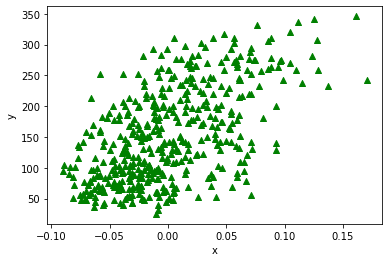

In [7]:
import matplotlib.pyplot as plt
plt.scatter(None, None, marker='^', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

그래프의 x축은 diabetes.data의 세번째 특성이고, y축은 diabetes.target입니다.  이 그래프를 보면 세 번째 특성과 타깃 데이터 사이에 정비례 관계가 있음을 알 수 있습니다. 둘이 서로 관계가 있으며, 따라서 중요한 특성이라는 것을 알 수 있습니다. 

#### 2. 훈련 데이터 준비하기

매번 diabetes.data를 입력하여 입력 데이터의 속성을 참고하는 방법은 번거로우니, 입력 데이터의 __세 번째 특성__을 미리 분리하여 변수 x에 저장하고 타깃 데이터는 변수 y에 저장합니다. 이후 실습에서는 x에 있는 데이터와 y에 있는 데이터를 이용해 모델을 훈련할 것입니다. 


In [ ]:
x = None
y = None

지금까지 회귀 알고리즘 중 선형 회귀 알고리즘의 개념을 알아보고 실제 알고리즘을 만들어 보기 위한 당뇨병 데이터셋을 준비했습니다. 다음에는 이 데이터를 가지고 모델을 훈련하기 위한 핵심 최적화 알고리즘인 경사 하강법(gradient descent)에 대해 배웁니다. 그 다음에는 1개의 뉴론으로 구성된 첫 번째 모델을 만들 것입니다. 

# 선형 회귀 모델에 사용한 그래프를 그리는 코드

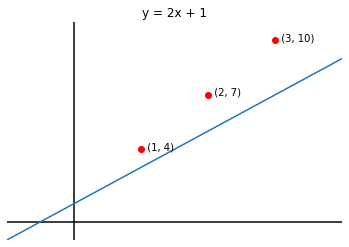

In [8]:
import numpy as np
import matplotlib.pyplot as plt

linex = np.array([x for x in range(-1, 5)])
liney = 2 * linex + 1

fig, ax = plt.subplots()
ax.axis('off')
ax.axvline(0, linestyle='-', color='k') # vertical lines
ax.axhline(0, linestyle='-', color='k') # horizontal line
plt.title('y = 2x + 1')
plt.axis([-1, 4, -1, 11])
plt.plot(linex, liney, '-')
plt.plot([1, 2, 3], [4, 7, 10], 'or' )
plt.text(1, 4, '  (1, 4)')
plt.text(2, 7, '  (2, 7)')
plt.text(3, 10, '  (3, 10)')
plt.show()

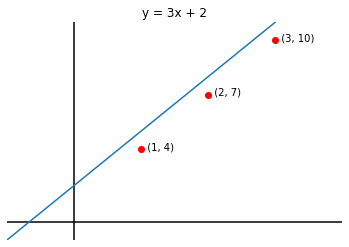

In [9]:
linex = np.array([x for x in range(-1, 5)])
liney = 3 * linex + 2

fig, ax = plt.subplots()
ax.axis('off')
ax.axvline(0, linestyle='-', color='k') # vertical lines
ax.axhline(0, linestyle='-', color='k') # horizontal line
plt.title('y = 3x + 2')
plt.axis([-1, 4, -1, 11])
plt.plot(linex, liney, '-')
plt.plot([1, 2, 3], [4, 7, 10], 'or' )
plt.text(1, 4, '  (1, 4)')
plt.text(2, 7, '  (2, 7)')
plt.text(3, 10, '  (3, 10)')
plt.show()

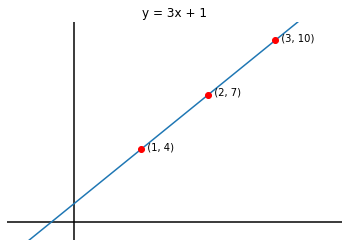

In [10]:
linex = np.array([x for x in range(-1, 5)])
liney = 3 * linex + 1

fig, ax = plt.subplots()
ax.axis('off')
ax.axvline(0, linestyle='-', color='k') # vertical lines
ax.axhline(0, linestyle='-', color='k') # horizontal line
plt.title('y = 3x + 1')
plt.axis([-1, 4, -1, 11])
plt.plot(linex, liney, '-')
plt.plot([1, 2, 3], [4, 7, 10], 'or' )
plt.text(1, 4, '  (1, 4)')
plt.text(2, 7, '  (2, 7)')
plt.text(3, 10, '  (3, 10)')
plt.show()

## 참고문헌

1. 케라스 창시자에게 배우는 딥러닝, 프랑소와 숄레, 길벗
1. 핸즈온 머신러닝, 오렐리앙 제롱, 한빛미디어
1. 딥러닝 입문, 박해선, 이지스 퍼블리싱
1. 파이썬으로 배우는 기계학습, 김영섭, K-MOOC

-------
__Be joyful always!__ 1 Thes.5:16